In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [ ]:
path = '../../../Data/2025/'
AMS_paths = ['250820_sabinene_O3_20C/', '250822_Sabinene_100ppb_0C/', '250825_Sabinene_100ppb_10C/', 
             '250826_Sabinene_100ppb_neg10C/', '250828_b-pinene_100ppb_20C/']

AMS = {}
for AMS_path in AMS_paths:
    df = import_data(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    AMS[name] = df

print(AMS['250822'].keys())
print(AMS.keys())

Index(['t_series', 'HROrg_M_all', 'HRNO3_M_all', 'HRSO4_M_all', 'HRNH4_M_all',
       'HRChl_M_all', 'Ratio_H_C_all_IA', 'Ratio_O_C_all_IA',
       'familyCHN_M_all', 'familyCHO1_M_all', 'familyCHO1N_M_all',
       'familyCH_M_all', 'MSSM_all_HROrg43', 'MSSM_all_HROrg44', 'Time'],
      dtype='object')
dict_keys(['250820', '250822', '250825', '250826', '250828'])


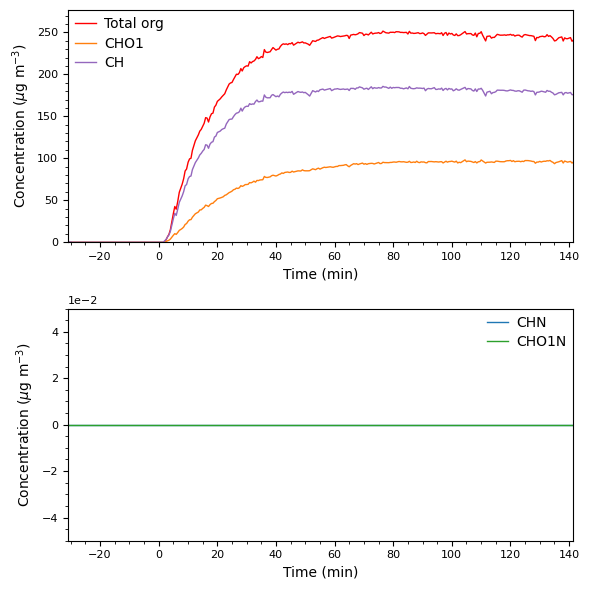

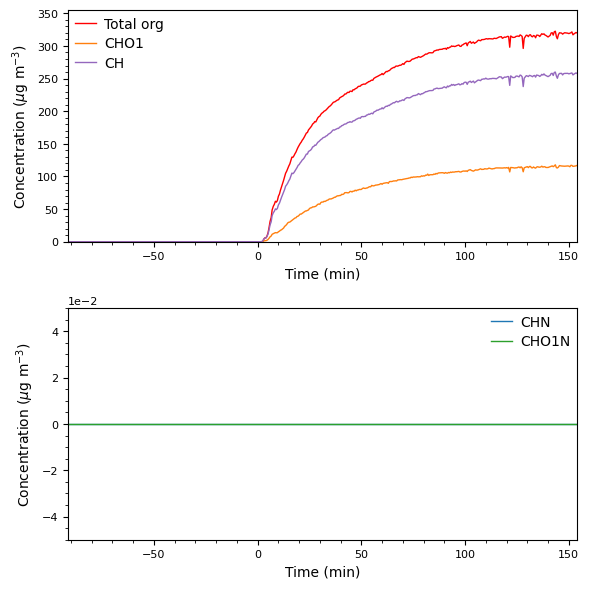

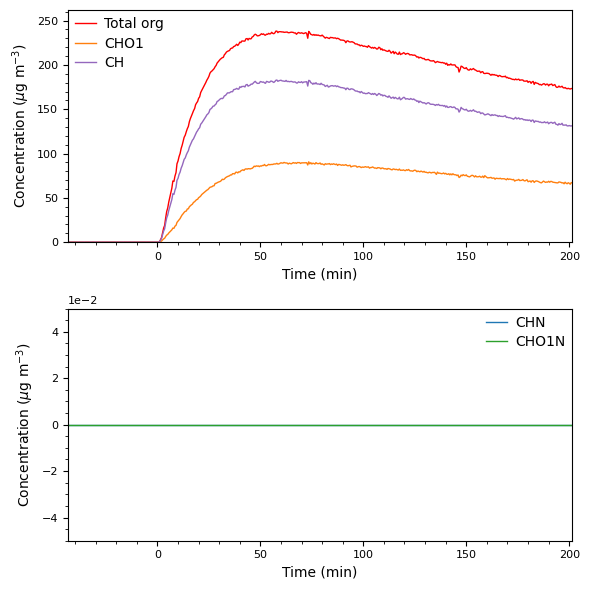

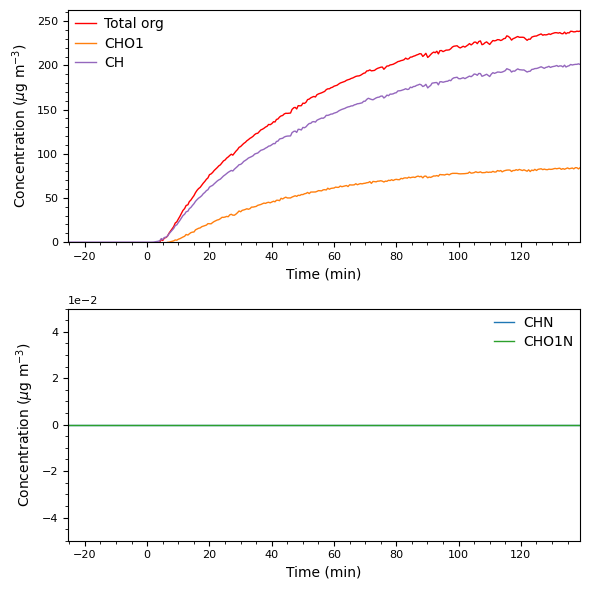

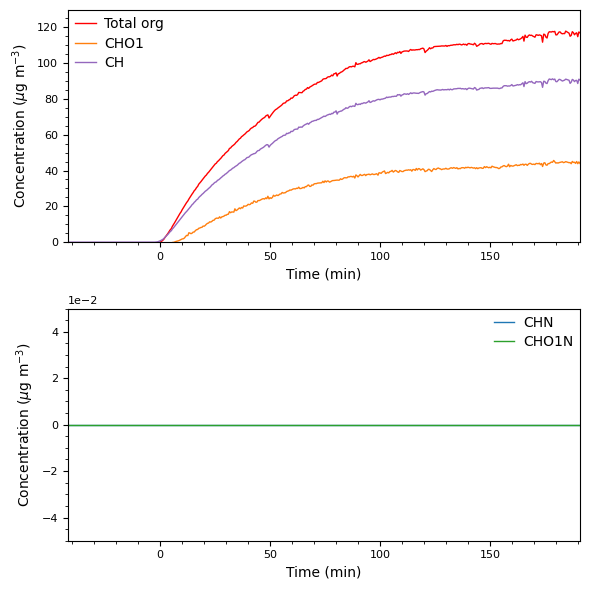

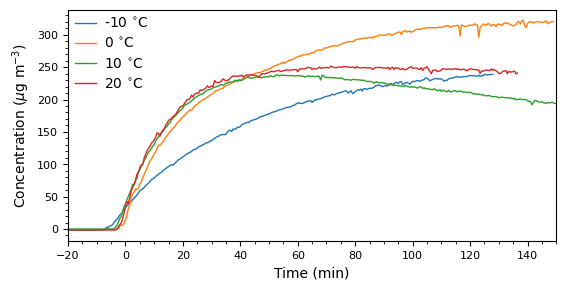

In [3]:
colors = ['r', 'tab:orange', 'tab:purple', 'tab:blue', 'tab:green']
start_times = ['2025-08-20 10:05', '2025-08-22 10:15', '2025-08-25 09:22', '2025-08-26 09:25', '2025-08-28 09:02']
dict_keys = ['250820', '250822', '250825', '250826', '250828']

for key, t_zero in zip(dict_keys, start_times):
    fig, ax = plt.subplots(2,1, figsize = (6, 6))

    for color, df_key in zip(colors[:3], ['HROrg_M_all', 'familyCHO1_M_all', 'familyCH_M_all']):
        plot_total(ax[0], AMS[key], df_key, color, False, t_zero)

    ax[0].set(ylabel = 'Concentration ($\mu$g m$^{-3}$)', ylim = (0, max(AMS[key]['HROrg_M_all'])+0.1*max(AMS[key]['HROrg_M_all'])))
    ax[0].legend(['Total org', 'CHO1', 'CH'])

    for color, df_key in zip(colors[3:], ['familyCHN_M_all', 'familyCHO1N_M_all']):
        plot_total(ax[1], AMS[key], df_key, color, False, t_zero)

    ax[1].set(ylabel = 'Concentration ($\mu$g m$^{-3}$)', ylim = (0, max(AMS[key]['familyCHN_M_all'])+0.1*max(AMS[key]['familyCHN_M_all'])))
    ax[1].legend(['CHN', 'CHO1N'])

    fig.tight_layout()
    fig.savefig(f'{key}_timeseries.jpg', dpi = 600)

timestamps = ['2025-08-26 09:36', '2025-08-22 10:20', '2025-08-25 09:27', '2025-08-20 10:10']
dict_keys_ordered = ['250826', '250822', '250825', '250820']
fig1, ax1 = plt.subplots(figsize = (6.3, 3))

for key, t_zero in zip(dict_keys_ordered, timestamps):
    plot_total(ax1, AMS[key], 'HROrg_M_all', None, False, t_zero)

ax1.set(ylabel = 'Concentration ($\mu$g m$^{-3}$)', xlim = (-20, 150))
ax1.legend(labels = ['-10 $^{\circ}$C', '0 $^{\circ}$C', '10 $^{\circ}$C', '20 $^{\circ}$C'])
fig1.savefig('Timeseries_sabinene.jpg', dpi = 600)
